<a href="https://colab.research.google.com/github/josedavid21/Tarea1SolisSoto/blob/master/LaboratorioEvolucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
"""
Acceso a este archivo de GoogleColab:
https://colab.research.google.com/drive/1W0a5V7dxAohkqj1ZqMYaLoASH3_jsUWY?usp=sharing

El siguiente laboratorio fue realizado empleando pygad.
Se tomó como base uno de los ejemplos encontrados en el repositorio de github
de la librería: el enlace a dicho repositorio se adjunta a continuación:
https://github.com/ahmedfgad/GeneticAlgorithmPython/blob/master/example.py

"""
!pip install pygad

In [54]:
import numpy
import pygad
import math

In [77]:
"""
A continuación se plantean los parámetros deseados y de entrada
También la función de calidad
"""

function_inputs = [10.08,10.17,9.91,9.74,10.21,9.82] # Function inputs. en este caso sería para A
desired_output = 0 # Function output.

def fitness_func(solution, solution_idx):
    twopi = 2*math.pi
    gx = numpy.sum(solution*2 + function_inputs*numpy.sin(twopi*solution)*twopi)
    output = (9.78*6) + numpy.sum(solution**2 - function_inputs*numpy.cos(twopi*solution))
    # Se usa 0.000001 para evitar conflictos de indeterminación
    fitness = 1.0 / (numpy.abs(gx) + 0.000001)
    return fitness

In [78]:
fitness_function = fitness_func

num_generations = 100 # Cantidad de generaciones.
num_parents_mating = 20 # Número de soluciones que serán padres.

# Población inicial:
# 1) Prepararla personalizadamente
# 2) Generar aleatoriamente, respetando cromosoma
sol_per_pop = 100 # Cantidad de soluciones en la poblacion
num_genes = len(function_inputs)

parent_selection_type = "rws" # Tipo de selección de padres
keep_parents = -1 # Padres que permanecerán vivos (-1 son todos, 0 ninguno, otro valor puede ser ingresado)

crossover_type = "two_points" # Tipo de cruce

# Parámetros referentes a la mutación de la población
mutation_type = "random" # Tipo de mutación dada por un operador
mutation_percent_genes = 20 # Porcentaje genético por mutar

last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]


In [79]:
# Se inicializa la clase que es capaz de realizar todo el algoritmo evolutivo
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       #on_stop=on_stop,
                       on_generation=callback_generation)


Generation = 1
Fitness    = 174.5579059001169
Change     = 0.0
Generation = 2
Fitness    = 174.5579059001169
Change     = 0.0
Generation = 3
Fitness    = 174.5579059001169
Change     = 0.0
Generation = 4
Fitness    = 174.5579059001169
Change     = 0.0
Generation = 5
Fitness    = 174.5579059001169
Change     = 0.0
Generation = 6
Fitness    = 174.5579059001169
Change     = 0.0
Generation = 7
Fitness    = 174.5579059001169
Change     = 0.0
Generation = 8
Fitness    = 174.5579059001169
Change     = 0.0
Generation = 9
Fitness    = 174.5579059001169
Change     = 0.0
Generation = 10
Fitness    = 174.5579059001169
Change     = 0.0
Generation = 11
Fitness    = 174.5579059001169
Change     = 0.0
Generation = 12
Fitness    = 174.5579059001169
Change     = 0.0
Generation = 13
Fitness    = 174.5579059001169
Change     = 0.0
Generation = 14
Fitness    = 174.5579059001169
Change     = 0.0
Generation = 15
Fitness    = 174.5579059001169
Change     = 0.0
Generation = 16
Fitness    = 174.5579059001169
Ch

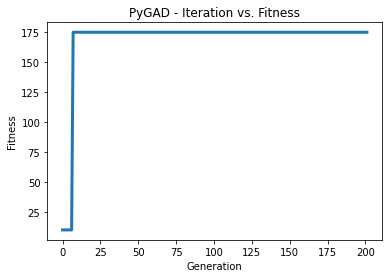

Parameters of the best solution : [-2.90076133  2.41136314 -3.53562601  1.57800723  1.54139855  2.62163821]
Fitness value of the best solution = 174.5579059001169
Index of the best solution : 0
Predicted output based on the best solution : 17.09779203161009
Best fitness value reached after 7 generations.


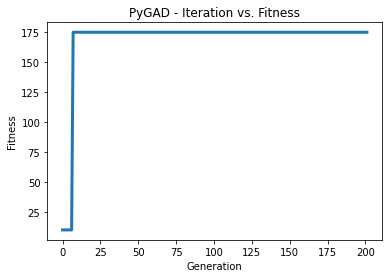

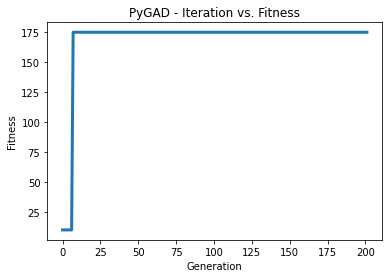

In [81]:
# Se corre el algoritmo evolutivo
ga_instance.run()

"""
Se procede a realizar la representación gráfica de los resultados obtenidos
Asi mismo se procede a guardar los resultados en un archivo
"""
ga_instance.plot_result()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

filename = 'genetic' 
ga_instance.save(filename=filename)


loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_result()